##HOMEWORK 2 ASSIGNMENT
KNN classification using Iris dataset 

##1. Implement KNN classification, using the sklearn package. 
See also: 
http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [6]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import neighbors, datasets, feature_selection

In [7]:
#Load Iris data

iris = datasets.load_iris() 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

# X_df{'Target'} = y

print 'iris data head:'
print iris_df.head()
print 'iris describe():'
print iris_df.describe()

print "label set: " + repr(iris_df['Target'].unique())

iris data head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
iris describe():
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000      

In [8]:
print iris

{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.

In [219]:
iris_df.plot;

In [9]:
# Splitting Data
# Create the training (and test) set using scikit-learn's train_test_split function
# Implement KNN

X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5).fit(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
knn.score(X_test, y_test)

0.97777777777777775

##2. Use the sklearn package to implement cross-validation for your classifier. 
Use 5 folds for your cross-validation. 
See also: http://scikit-learn.org/stable/modules/cross_validation.html#

In [30]:
# Cross-validate
iris.data.shape, iris.target.shape

clf = neighbors.KNeighborsClassifier(n, weights='uniform')
clf.fit(X, y)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)
print "Scores: %s" % (scores) 
print "Mean Score: {0:.2f} (+/- {1:.2f})".format(scores.mean(), scores.std())

Scores: [ 0.96666667  0.96666667  0.96666667  1.          1.        ]
Mean Score: 0.98 (+/- 0.02)


##3. Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset. 
Hint: This hyperparameter will be a number between 1 and 150 :)



In [32]:
n_neighbors = range(1, 51)
print n_neighbors

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [33]:
scores = []
n_neighbors = range(1, 51)
for n in n_neighbors:
   clf = neighbors.KNeighborsClassifier(n)
   clf.fit(X_train, y_train)
   scores.append(clf.score(X_test, y_test))

print "n_neighbors: %s"%(n_neighbors)
print "scores: %s"%(scores)
print "X_train: %s"%(X_train)

# It looks like scores is highests when K = 6, 8, 11

n_neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
scores: [0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.9555555555555556, 0.9555555555555556, 0.97777777777777775, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333

In [198]:
scores

[0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 1.0,
 0.97777777777777775,
 1.0,
 0.97777777777777775,
 0.97777777777777775,
 1.0,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.97777777777777775,
 0.9555555555555556,
 0.9555555555555556,
 0.97777777777777775,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.93333333333333335,
 0.9555555555555556,
 0.9555555555555556,
 0.93333333333333335,
 0.93333333333333335,
 0.91111111111111109,
 0.93333333333333335,
 0.93333333333333335,
 0.933333333

In [53]:
# Use for loop
max_idx = [idx + 1 for idx, score in enumerate(scores) if score == max(scores)]
print "Highest Scores for k: ", max_idx

Highest Scores for k:  [6, 8, 11]


##4. Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. 
Explain in words what you are seeing.

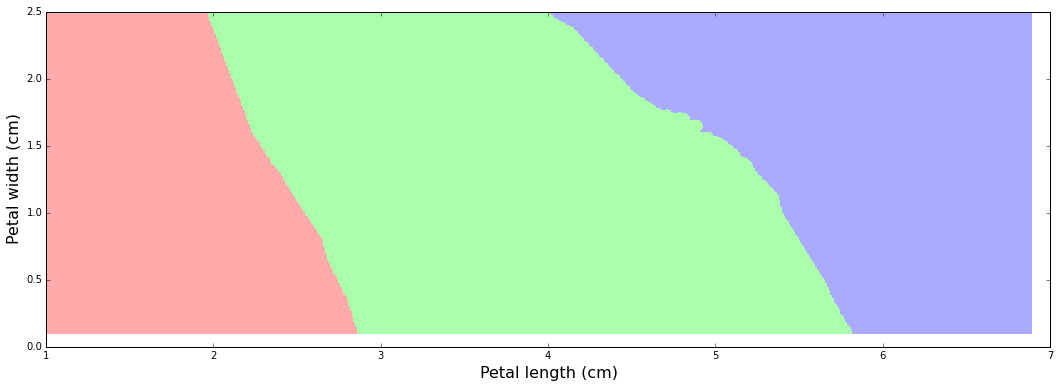

In [34]:
from matplotlib.colors import ListedColormap

clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)

h = 0.01

# Creating color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plotting the decision boundary.
x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Putting the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light);
plt.xlabel('Petal length (cm)', fontsize=16);
plt.ylabel('Petal width (cm)', fontsize=16);

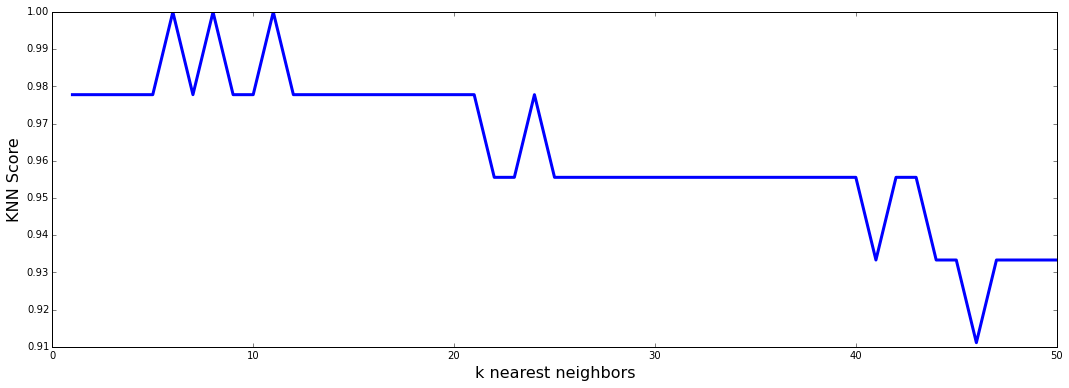

In [35]:
#4. Plot k v. knn_score

plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0);
plt.xlabel('k nearest neighbors', fontsize=16);
plt.ylabel('KNN Score', fontsize=16);

##5. Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn. 
Cross validation is a very important concept. Implementing it yourself in Python is the best way to learn and understand it. 
Compare the results of your cross-validation code with your results using the cross-validation in sklearn.

In [95]:
## WRITE CROSS VALIDATION FUNCTION FROM SCRATCH

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

## 1 - shuffle the data
X = iris.data
import random
import numpy

folds = 6

def custom_cross_val(X, folds):
    accuracies = []
    np.random.shuffle(X)
    return data

custom_cross_val(X, folds)

array([[ 6.5,  3. ,  5.8,  2.2],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 7.1,  3. ,  5.9,  2.1],
       [ 6.1,  2.8,  4.7,  1.2],
       [ 6.3,  3.4,  5.6,  2.4],
       [ 6.4,  2.7,  5.3,  1.9],
       [ 6.9,  3.2,  5.7,  2.3],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 6.3,  2.5,  4.9,  1.5],
       [ 7.9,  3.8,  6.4,  2. ],
       [ 6.8,  3.2,  5.9,  2.3],
       [ 5.1,  3.4,  1.5,  0.2],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 4.5,  2.3,  1.3,  0.3],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 5. ,  3.2,  1.2,  0.2],
       [ 6.1,  3. ,  4.9,  1.8],
       [ 6.3,  2.7,  4.9,  1.8],
       [ 4.4,  3.2,  1.3,  0.2],
       [ 6.7,  2.5,  5.8,  1.8],
       [ 6.6,  2.9,  4.6,  1.3],
       [ 4.8,  3.1,  1.6,  0.2],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 5.8,  2.7,  4.1,  1. ],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5.7,  2.5,  5. ,  2. ],
       [ 5. ,  3.5,  1.6,  0.6],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 5

In [96]:
## 2 - split the data

numpy.array_split(data, folds,0)

[array([[ 6.5,  3. ,  5.8,  2.2],
        [ 5.9,  3.2,  4.8,  1.8],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 7.1,  3. ,  5.9,  2.1],
        [ 6.1,  2.8,  4.7,  1.2],
        [ 6.3,  3.4,  5.6,  2.4],
        [ 6.4,  2.7,  5.3,  1.9],
        [ 6.9,  3.2,  5.7,  2.3],
        [ 6.1,  2.9,  4.7,  1.4],
        [ 5.6,  2.8,  4.9,  2. ],
        [ 6.3,  2.5,  4.9,  1.5],
        [ 7.9,  3.8,  6.4,  2. ],
        [ 6.8,  3.2,  5.9,  2.3],
        [ 5.1,  3.4,  1.5,  0.2],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 4.5,  2.3,  1.3,  0.3],
        [ 7. ,  3.2,  4.7,  1.4],
        [ 5. ,  3.2,  1.2,  0.2],
        [ 6.1,  3. ,  4.9,  1.8],
        [ 6.3,  2.7,  4.9,  1.8],
        [ 4.4,  3.2,  1.3,  0.2],
        [ 6.7,  2.5,  5.8,  1.8],
        [ 6.6,  2.9,  4.6,  1.3],
        [ 4.8,  3.1,  1.6,  0.2],
        [ 7.7,  2.8,  6.7,  2. ]]), array([[ 5.8,  2.7,  4.1,  1. ],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5.7,  2.5,  5. ,  2. ],
        [ 5. ,  3.5,  1.6,  0.6],
        [ 5.8

In [97]:
## 3 - Use KNN for each fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

scores = []
n_neighbors = range(1, 51)
for n in n_neighbors:
   clf = neighbors.KNeighborsClassifier(n)
   clf.fit(X_train, y_train)
   scores.append(clf.score(X_test, y_test))

scores

## Scores are very low... 

[0.23333333333333334,
 0.36666666666666664,
 0.40000000000000002,
 0.43333333333333335,
 0.43333333333333335,
 0.40000000000000002,
 0.40000000000000002,
 0.43333333333333335,
 0.36666666666666664,
 0.40000000000000002,
 0.46666666666666667,
 0.46666666666666667,
 0.40000000000000002,
 0.33333333333333331,
 0.33333333333333331,
 0.36666666666666664,
 0.33333333333333331,
 0.43333333333333335,
 0.43333333333333335,
 0.36666666666666664,
 0.40000000000000002,
 0.43333333333333335,
 0.40000000000000002,
 0.40000000000000002,
 0.36666666666666664,
 0.36666666666666664,
 0.29999999999999999,
 0.29999999999999999,
 0.29999999999999999,
 0.29999999999999999,
 0.29999999999999999,
 0.29999999999999999,
 0.33333333333333331,
 0.33333333333333331,
 0.29999999999999999,
 0.36666666666666664,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.36666666666666664,
 0.33333333333333331,
 0.29999999999999999,
 0.29999999999999999,
 0.3333333

In [98]:
max_k = [k + 1 for k, score in enumerate(scores) if score == max(scores)]
max_k

[11, 12]

In [99]:
scores = cross_val_score(clf, iris_df.values, iris.target, cv=6)

## 4 - take the mean for all folds in step 3
print scores.mean()


0.569444444444


In [ ]:
## 5 - Is the model valid? 
## Very inaccurate... need to improve... 